# Combining Sampling Methods with Attractor Dynamics in Spiking Models of Head-Direction Systems
## by Vojko Pjanovic, Jacob Zavatone-Veth, Paul Masset, Sander Keemink & Michele Nardin. 

Code written by Vojko Pjanovic and Michele Nardin.

This notebook includes the code for Fig. 4

In [182]:
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
from scipy.stats import gamma, skew, kurtosis


In [183]:
# initialize parameters and variables
np.random.seed(0)
dt = 0.001
radius = 4
nt=20000
K = 2
Nr = 20
beta_scale = 10
N = 8
lam = 10

D = np.array([[np.sin(2*np.pi/N*i),np.cos(2*np.pi/N*i)] for i in range(N)])/4
T = np.diag(D @ D.T) /2

np.random.seed(0)
ang_vel=np.concatenate([[np.random.randn()]*2000 for _ in range(int((nt+1)/2000))])*0.005
ang_vel = ndi.gaussian_filter1d(ang_vel,500,axis=0)

In [184]:
from funcs import run_simulation

V, r, s, sigma, angle_est, angle_real, ang_vel, x_y_est = run_simulation(N, K, nt, lam, D, Nr, radius, ang_vel, beta_scale, dt, seed=0)

## Panel A

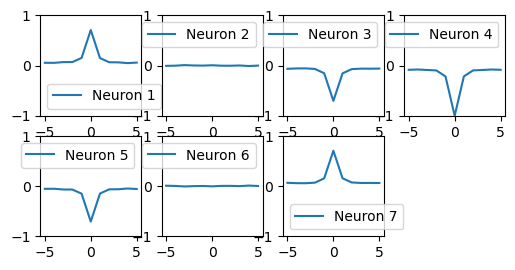

In [185]:
# plot cross correlation of neuron 1 voltage and each other neuron!!
plt.figure(figsize=(6,6))

for i in range(1,N):
    plt.subplot(4,4,i)
    # plt.plot(np.correlate(V[0,beg:end],V[i,beg:end],'full'),label=f'Neuron {i}')
    plt.xcorr(V[0],V[i],maxlags=5,label=f'Neuron {i}',usevlines=False,detrend=lambda x: x-np.mean(x),linestyle = '-',marker='')
    plt.ylim([-1,1])
    plt.legend()
    # plt.show()

## Panel B

In [186]:
def mask_lower_diag(M):
    # cover lower diagonal with nans
    MM = np.copy(M)
    MM[np.triu_indices(M.shape[0], k=0)] = np.nan
    return MM

O_f = - D @ D.T
O_s = lam * D @ D.T

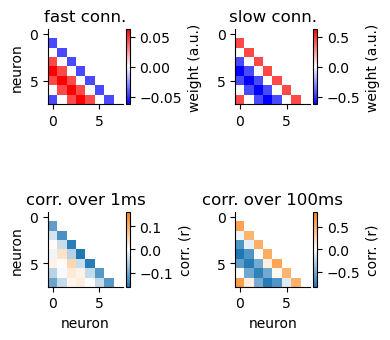

In [187]:
# put the 4 plots above into 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(4, 4))
im=axs[0, 0].imshow(mask_lower_diag(O_f),cmap='bwr',vmin=-np.max(np.abs(O_f)),vmax=np.max(np.abs(O_f)))
axs[0, 0].set_aspect('equal')
axs[0, 0].set_ylabel('neuron')
axs[0, 0].set_title('fast conn.')
# add colorbar
cbar = plt.colorbar(im, ax=axs[0, 0], fraction=0.046, pad=0.04)
cbar.set_label('weight (a.u.)')

im= axs[0, 1].imshow(mask_lower_diag(O_s),cmap='bwr',vmin=-np.max(np.abs(O_s)),vmax=np.max(np.abs(O_s)))
axs[0, 1].set_aspect('equal')
axs[0, 1].set_title('slow conn.')
# add colorbar
cbar = plt.colorbar(im, ax=axs[0, 1], fraction=0.046, pad=0.04)
cbar.set_label('weight (a.u.)')

short_corr = mask_lower_diag(np.corrcoef(ndi.gaussian_filter1d(sigma,1,axis=1)))
long_corr = mask_lower_diag(np.corrcoef(ndi.gaussian_filter1d(sigma,100,axis=1)))

# plot short and long time correlations
# Create blue-orange colormap using standard matplotlib colors
from matplotlib.colors import LinearSegmentedColormap
blue = plt.cm.tab10(0)  # standard blue
orange = plt.cm.tab10(1)  # standard orange
blue_orange_cmap = LinearSegmentedColormap.from_list('blue_orange', [blue, 'white', orange])

im=axs[1, 0].imshow(short_corr,cmap=blue_orange_cmap,vmin=-np.nanmax(np.abs(short_corr)),vmax=np.nanmax(np.abs(short_corr)))
axs[1, 0].set_aspect('equal')
axs[1, 0].set_xlabel('neuron')
axs[1, 0].set_ylabel('neuron')
axs[1, 0].set_title('corr. over 1ms')
# colorbar
cbar = plt.colorbar(im, ax=axs[1, 0], fraction=0.046, pad=0.04)
cbar.set_label('corr. (r)')

im=axs[1, 1].imshow(long_corr,cmap=blue_orange_cmap,vmin=-np.nanmax(np.abs(long_corr)),vmax=np.nanmax(np.abs(long_corr)))
axs[1, 1].set_aspect('equal')
axs[1, 1].set_xlabel('neuron')
axs[1, 1].set_title('corr. over 100ms')
# colorbar
cbar = plt.colorbar(im, ax=axs[1, 1], fraction=0.046, pad=0.04)
cbar.set_label('corr. (r)')
# remove top right spines
for ax in axs.flat:
    ax.label_outer()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.tight_layout()

plt.savefig('fast_slow_correlations_conns.pdf', bbox_inches='tight')

plt.show()

## Panel C

In [188]:
dt = 0.001
radius = 5
nt=20000
K = 2
N = 50
lam = 10
Nr = 1000
beta_scale = 10

ang_vel = np.ones(nt)*0.001

D = np.random.randn(N,K) 
D = D / np.linalg.norm(D,axis=0)

In [189]:
V, r, s, sigma, angle_est, angle_real, ang_vel, x_y_est = run_simulation(N, K, nt, lam, D, Nr, radius, ang_vel, beta_scale, dt, seed=0)

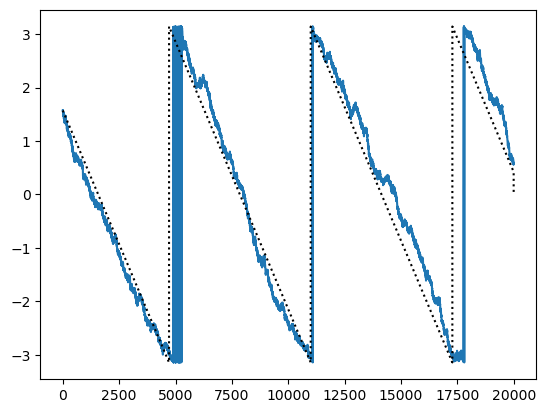

In [190]:
# plot the two
plt.plot(angle_est)
plt.plot(angle_real,'k',ls='dotted')

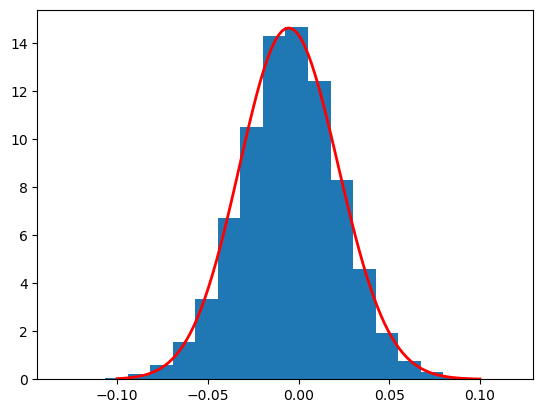

In [191]:
# diff of bump movement
angle_diff = np.unwrap(angle_est)
angle_diff = angle_diff[5:] - angle_diff[:-5]
plt.hist(angle_diff, bins=20, density=True)
# fit gamma distribution and plot the density on top of the histogram
shape, loc, scale = gamma.fit(angle_diff)
x = np.linspace(-0.1, 0.1, 100)
plt.plot(x, gamma.pdf(x, shape, loc=loc, scale=scale), 'r-', lw=2)
plt.show()

In [192]:
shape, loc, scale

(2663.3219513539225, -1.4105849820268022, 0.0005277645832852179)

In [193]:
# compute skew and kurt
skewness = skew(angle_diff)
kurt = kurtosis(angle_diff)
print(skewness, kurt)

-0.044474228544767944 0.27089645133920204


In [194]:
xs, ys = x_y_est[0,:], x_y_est[1,:]

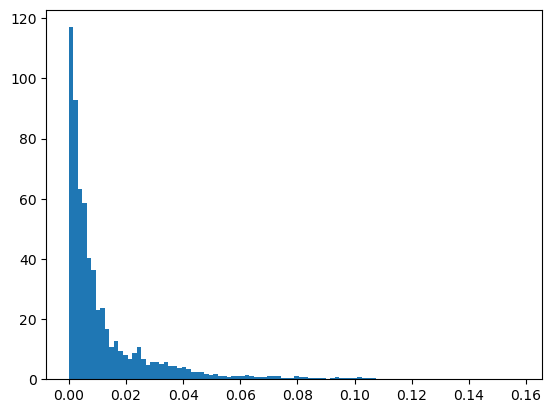

In [195]:
# plot hist of differences xs and ys
plt.hist(np.diff(xs)**2 + np.diff(ys)**2, bins=100, density=True)
plt.show()

In [196]:
Nr = 100
beta_scale = 10

D = np.random.randn(N,K) 
D = D / np.linalg.norm(D,axis=0)

V, r, s, sigma, angle_est, angle_real, ang_vel, x_y_est = run_simulation(N, K, nt, lam, D, Nr, radius, ang_vel, beta_scale, dt, seed=0)

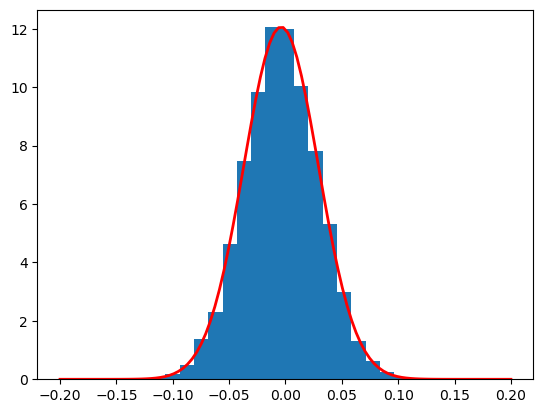

In [197]:
bump_diffs = np.unwrap(angle_est)
bump_diffs = bump_diffs[5:] - bump_diffs[:-5]
# hist bump differences
bump_diffs = np.array(bump_diffs).flatten()
plt.hist(bump_diffs, bins=20, density=True)    
shape, loc, scale = gamma.fit(bump_diffs)
x = np.linspace(-0.2, 0.2, 100)
plt.plot(x, gamma.pdf(x, shape, loc=loc, scale=scale), 'r-', lw=2)
plt.show()

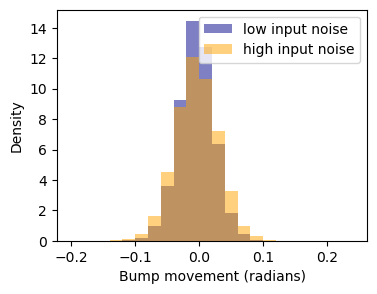

In [198]:
plt.figure(figsize=(4,3))
plt.hist(angle_diff, bins=np.arange(-0.2, 0.25, 0.02), density=True,alpha=0.5,color='darkblue',label='low input noise')
plt.hist(bump_diffs, bins=np.arange(-0.2, 0.25, 0.02), density=True,alpha=0.5,color='orange',label='high input noise')
plt.xlabel('Bump movement (radians)')
plt.ylabel('Density')
plt.legend()

## Panel D

In [199]:
dt = 0.001
radius = 4
nt=100000
K = 2
ang = 0

N=200
lam = 1

D = np.array([[np.sin(2*np.pi/N*i),np.cos(2*np.pi/N*i)] for i in range(N)])/20
Nr = 1000

beta_scale = 5

ang_vel = np.linspace(-0.01,0.01,nt)

V, r, s, sigma, angle_est, angle_real, ang_vel, x_y_est = run_simulation(N, K, nt, lam, D, Nr, radius, ang_vel, beta_scale, dt, seed=0)

In [200]:
xs, ys = x_y_est[0,:], x_y_est[1,:]

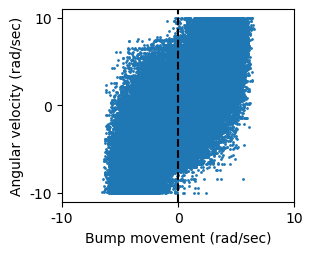

In [201]:
# scatter plot bump movement vs angular velocity
plt.figure(figsize=(3,2.5))
bump_mov = np.unwrap(np.arctan2(ys,xs))
bump_mov = bump_mov[5:] - bump_mov[:-5]
plt.scatter(bump_mov, ang_vel[5:],s=1,rasterized=True)
plt.yticks([-0.01,0,0.01],[-10,0,10])
plt.xticks([-0.1,0,0.1],[-10,0,10])
plt.ylabel('Angular velocity (rad/sec)')
plt.xlabel('Bump movement (rad/sec)')
# plt.ylabel('Angular velocity')
plt.axvline(0,c='k',ls='--')
# plt.axhline(0,c='k',ls='--')
# plt.savefig('bump_vs_angvel.pdf',dpi=300)

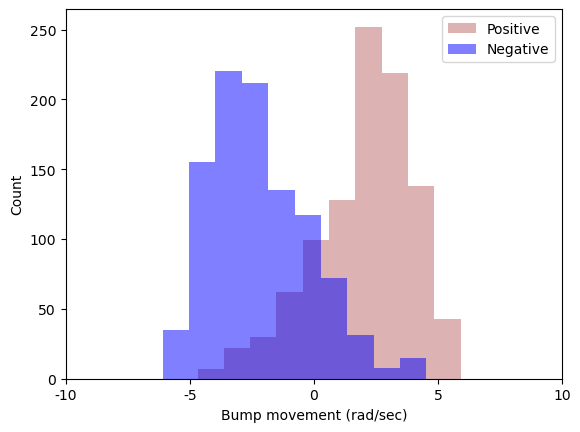

In [202]:
min = 0.0039
max = 0.0041
# plt.hist(bump_mov[(ang_vel[5:]>min)*(ang_vel[5:]<max)],bins=np.arange(-0.1,0.11,0.025),alpha=0.3,color='darkred',label='Positive')
plt.hist(bump_mov[(ang_vel[5:]>min)*(ang_vel[5:]<max)],bins=10,alpha=0.3,color='darkred',label='Positive')
# plt.hist(bump_mov[(ang_vel[5:]<-min)*(ang_vel[5:]>-max)],bins=np.arange(-0.1,0.11,0.025),alpha=0.5,color='b',label='Negative')
plt.hist(bump_mov[(ang_vel[5:]<-min)*(ang_vel[5:]>-max)],bins=10,alpha=0.5,color='b',label='Negative')
plt.legend()
plt.xticks(np.arange(-0.1,0.11,0.05),np.arange(-10,11,5))
plt.ylabel('Count')
plt.xlabel('Bump movement (rad/sec)')
plt.savefig('bump_vs_angvel_hist.pdf',dpi=300)